In [38]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from dataprep.eda import create_report
from datetime import datetime

In [39]:
def sin_transform(values):
        """
        Applies SIN transform to a series value.
        Args:
            values (pd.Series): A series to apply SIN transform on.
        Returns
            (pd.Series): The transformed series.
        """

        return np.sin(2 * np.pi * values / len(set(values)))
def cos_transform(values):
    """
    Applies COS transform to a series value.
    Args:
        values (pd.Series): A series to apply SIN transform on.
    Returns
        (pd.Series): The transformed series.
    """
    return np.cos(2 * np.pi * values / len(set(values)))

# Read Fitbit Data (passively collected data)

In [40]:
def fitbit_basic_preprocessing(df):
    # selecting the experiment days
    df = df.sort_values(by='date', ascending=True)
    df['date'] = pd.to_datetime(df['date'].astype("str"), format='%Y-%m-%d')
    df = df.loc[((df['date'] >'2021-05-23') & (df['date'] <'2021-07-27')) | ((df['date'] >'2021-11-14') & (df['date'] <'2022-01-18'))]
    df.reset_index(inplace=True, drop=True)

    # drop duplicates
    df=df.loc[df.astype(str).drop_duplicates().index]

    # convert data types falsely described as categorical
    df[["lightly_active_minutes", "moderately_active_minutes", "very_active_minutes", "sedentary_minutes"]]=df[["lightly_active_minutes", "moderately_active_minutes", "very_active_minutes","sedentary_minutes"]].apply(pd.to_numeric)

    return df

In [41]:
fitbit=pd.read_pickle('data/daily_fitbit_df_unprocessed.pkl')
fitbit=fitbit_basic_preprocessing(fitbit)
fitbit

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,<30,MALE,<19
1,621e301e67b776a240608a72,2021-05-24,34.710232,NaN,NaN,NaN,NaN,74.0,0.700000,0.700,...,0.847826,0.922222,12441.0,164.0,997.0,49.0,0.0,<30,FEMALE,19.0
3,621e301367b776a24057738e,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7279.0,32.0,236.0,30.0,0.0,>=30,MALE,23.0
4,621e360b67b776a24039709f,2021-05-24,NaN,68.321,31.413,NaN,15.4,69.0,0.633333,0.650,...,NaN,NaN,7493.0,127.0,1306.0,7.0,0.0,>=30,FEMALE,<19
5,621e2fce67b776a240279baa,2021-05-24,34.783747,83.170,15.941,96.6,15.2,70.0,0.733333,0.725,...,1.240741,0.663717,3317.0,701.0,735.0,0.0,0.0,<30,MALE,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,621e345267b776a240691064,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<30,FEMALE,20.0
4960,621e310d67b776a24003096d,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>=30,FEMALE,20.0
4961,621e324e67b776a2400191cb,2022-01-17,33.104768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.974093,0.381818,4278.0,NaN,NaN,NaN,NaN,>=30,MALE,27.0
4962,621e30f467b776a240f22944,2022-01-17,34.352490,NaN,NaN,NaN,13.4,NaN,NaN,NaN,...,1.103806,0.849315,3122.0,2.0,1348.0,0.0,0.0,<30,MALE,20.0


In [42]:
fitbit.to_pickle('data/fitbit_to_baseline_model.pkl')

# Fitbit: delete almost empty columns and one-hot encoding

In [43]:
data=pd.read_pickle('data/fitbit_to_baseline_model.pkl')

In [44]:
# Because of way too many missing values in spo2 (80%), badgeType (92%), and scl_avg (95%), I drop these 3 columns
data=data.drop(columns=['spo2', 'badgeType', 'scl_avg'])
data

,id,date,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,...,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,14.8,78.0,0.833333,0.675,0.866667,...,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,<30,MALE,<19
1,621e301e67b776a240608a72,2021-05-24,34.710232,NaN,NaN,NaN,74.0,0.700000,0.700,0.833333,...,0.847826,0.922222,12441.0,164.0,997.0,49.0,0.0,<30,FEMALE,19.0
3,621e301367b776a24057738e,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7279.0,32.0,236.0,30.0,0.0,>=30,MALE,23.0
4,621e360b67b776a24039709f,2021-05-24,NaN,68.321,31.413,15.4,69.0,0.633333,0.650,0.800000,...,NaN,NaN,7493.0,127.0,1306.0,7.0,0.0,>=30,FEMALE,<19
5,621e2fce67b776a240279baa,2021-05-24,34.783747,83.170,15.941,15.2,70.0,0.733333,0.725,0.633333,...,1.240741,0.663717,3317.0,701.0,735.0,0.0,0.0,<30,MALE,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,621e345267b776a240691064,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<30,FEMALE,20.0
4960,621e310d67b776a24003096d,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>=30,FEMALE,20.0
4961,621e324e67b776a2400191cb,2022-01-17,33.104768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.974093,0.381818,4278.0,NaN,NaN,NaN,NaN,>=30,MALE,27.0
4962,621e30f467b776a240f22944,2022-01-17,34.352490,NaN,NaN,13.4,NaN,NaN,NaN,NaN,...,1.103806,0.849315,3122.0,2.0,1348.0,0.0,0.0,<30,MALE,20.0


In [45]:
data.select_dtypes(include=['object'])

,id,activityType,mindfulness_session,age,gender,bmi
0,621e2e8e67b776a24055b564,[Walk],False,<30,MALE,<19
1,621e301e67b776a240608a72,None,False,<30,FEMALE,19.0
3,621e301367b776a24057738e,[Run],False,>=30,MALE,23.0
4,621e360b67b776a24039709f,None,False,>=30,FEMALE,<19
5,621e2fce67b776a240279baa,None,False,<30,MALE,24.0
...,...,...,...,...,...,...
4959,621e345267b776a240691064,None,False,<30,FEMALE,20.0
4960,621e310d67b776a24003096d,None,False,>=30,FEMALE,20.0
4961,621e324e67b776a2400191cb,None,False,>=30,MALE,27.0
4962,621e30f467b776a240f22944,None,False,<30,MALE,20.0


# bmi

<AxesSubplot: xlabel='count', ylabel='bmi'>

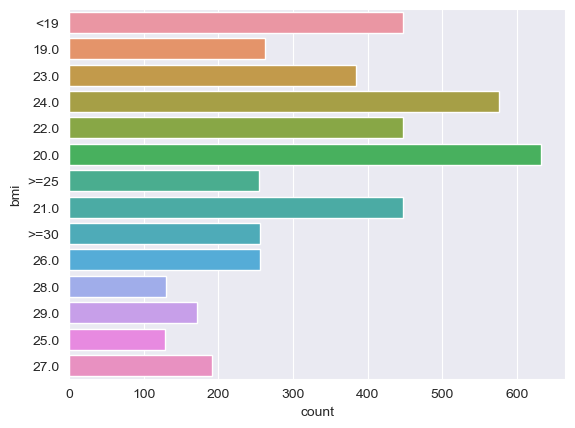

In [46]:
sns.countplot(y="bmi", data=data)

<AxesSubplot: xlabel='count', ylabel='bmi'>

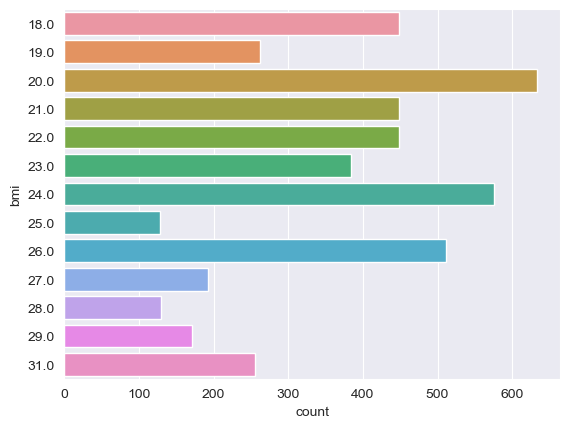

In [47]:
data["bmi"] = data["bmi"].apply(lambda x: 31.0 if x=='>=30' else x)
data["bmi"] = data["bmi"].apply(lambda x: 18.0 if x=='<19' else x)
data["bmi"] = data["bmi"].apply(lambda x: 26.0 if x=='>=25' else x) # tricky replacement? potential overlap between overweight and obese

sns.countplot(y="bmi", data=data)

<AxesSubplot: xlabel='count', ylabel='bmi_category'>

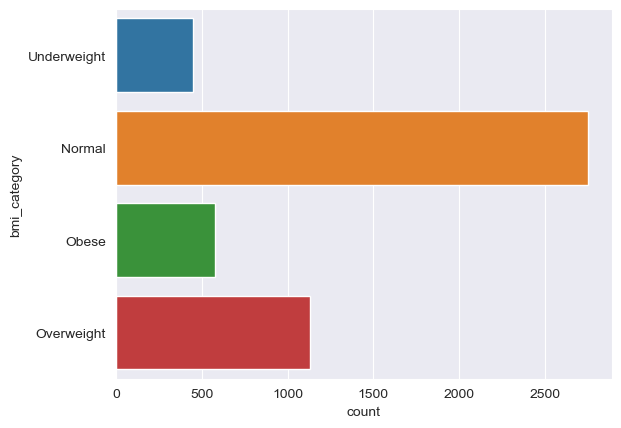

In [48]:
data['bmi_category'] = data.bmi.apply(lambda bmi: 'Underweight' if bmi<18.5 else ('Normal' if bmi<25 else ('Overweight' if bmi<30 else 'Obese')))
data=data.drop(columns=['bmi'])

sns.countplot(y="bmi_category", data=data)

In [49]:
bmi_category=pd.get_dummies(data['bmi_category'])
data = pd.concat([data, bmi_category], axis=1)
data.drop(['bmi_category'], axis=1, inplace=True)

# Age

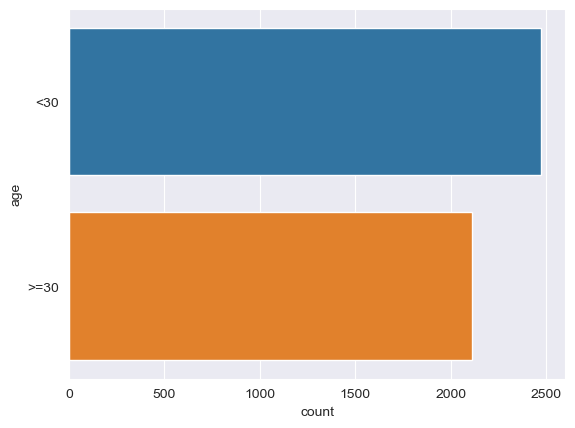

In [50]:
sns.countplot(y="age", data=data);

In [51]:
age=pd.get_dummies(data['age'])
data = pd.concat([data, age], axis=1)
data.drop(['age'], axis=1, inplace=True)
data=data.rename(columns={"<30": "below_30s", ">=30": "above_30s"})

# mindfulness_sessions

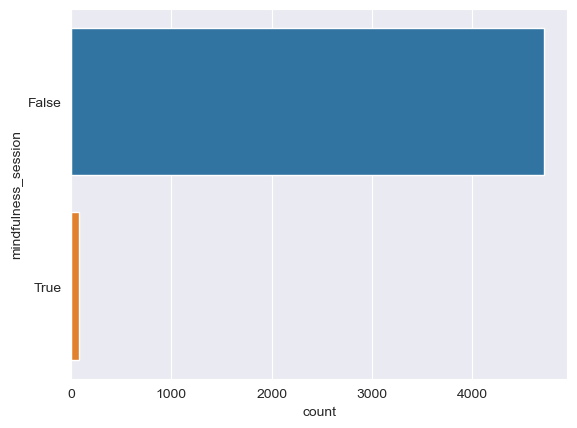

In [52]:
# highly imbalanced
sns.countplot(y="mindfulness_session", data=data);

In [53]:
mind=pd.get_dummies(data['mindfulness_session'])
data = pd.concat([data, mind], axis=1)
data.drop(['mindfulness_session'], axis=1, inplace=True)

# Gender

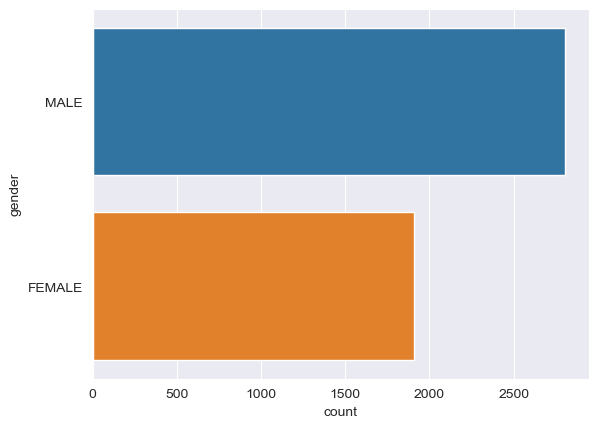

In [54]:
sns.countplot(y="gender", data=data);

In [55]:
gender=pd.get_dummies(data['gender'])
data = pd.concat([data, gender], axis=1)
data.drop(['gender'], axis=1, inplace=True)

# activityType

In [56]:
data['activityType'].value_counts()

[Walk]                          1107
[Workout]                         87
[Bike]                            77
[Run]                             50
[Sport]                           34
                                ... 
[Run, Workout, Walk]               1
[Treadmill, Weights]               1
[Workout, Hike, Walk]              1
[Walk, Sport, Bike]                1
[Run, Aerobic Workout, Walk]       1
Name: activityType, Length: 67, dtype: int64

In [57]:
import warnings
warnings.filterwarnings("ignore")

In [58]:
s = data['activityType']

dum=pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)
df = pd.concat([s, dum], axis=1)
df

,activityType,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,[Walk],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[Run],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4960,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4961,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4962,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
data = pd.concat([data, df], axis=1)
data = data.drop(columns='activityType')
data.columns

Index([                              'id',                             'date',
                    'nightly_temperature',                           'nremhr',
                                  'rmssd',        'full_sleep_breathing_rate',
                           'stress_score',          'sleep_points_percentage',
             'exertion_points_percentage', 'responsiveness_points_percentage',
            'daily_temperature_variation',                         'calories',
              'filteredDemographicVO2Max',                         'distance',
                                    'bpm',           'lightly_active_minutes',
              'moderately_active_minutes',              'very_active_minutes',
                      'sedentary_minutes',                       'resting_hr',
                         'sleep_duration',              'minutesToFallAsleep',
                          'minutesAsleep',                     'minutesAwake',
                     'minutesAfterWakeup',          

In [60]:
data

,id,date,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,14.8,78.0,0.833333,0.675,0.866667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e301e67b776a240608a72,2021-05-24,34.710232,NaN,NaN,NaN,74.0,0.700000,0.700,0.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e301367b776a24057738e,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,621e360b67b776a24039709f,2021-05-24,NaN,68.321,31.413,15.4,69.0,0.633333,0.650,0.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,621e2fce67b776a240279baa,2021-05-24,34.783747,83.170,15.941,15.2,70.0,0.733333,0.725,0.633333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,621e345267b776a240691064,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4960,621e310d67b776a24003096d,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4961,621e324e67b776a2400191cb,2022-01-17,33.104768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4962,621e30f467b776a240f22944,2022-01-17,34.352490,NaN,NaN,13.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
data.to_pickle('data/fitbit_all_numerical.pkl')

# Read semas (self-reported data)

In [62]:
def sema_basic_preprocessing(df):
    df["negative_feelings"] = np.where(df['TENSE/ANXIOUS']== 1, 1, np.where(df['ALERT']==1,1, np.where(df['SAD']==1,1, np.where(df['TIRED']==1,1, 0))))
    df["positive_feelings"] = np.where(df['HAPPY']== 1, 1, np.where(df['NEUTRAL']==1,1, np.where(df['RESTED/RELAXED']==1,1, 0)))
    df = df.drop(columns=['ALERT', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'SAD', 'TENSE/ANXIOUS','TIRED'])
    sns.countplot(y="negative_feelings", data=df)
    plt.show()
    sns.countplot(y="positive_feelings", data=sema)
    plt.show()

    return df

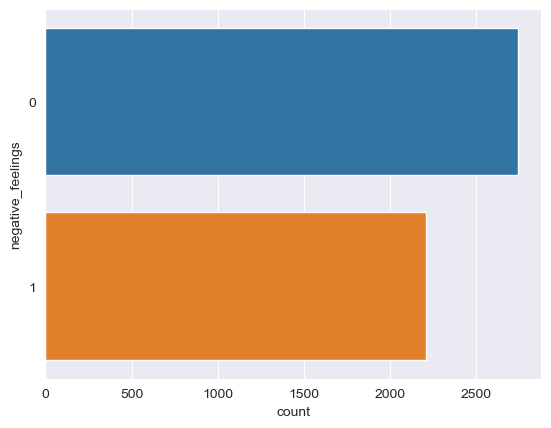

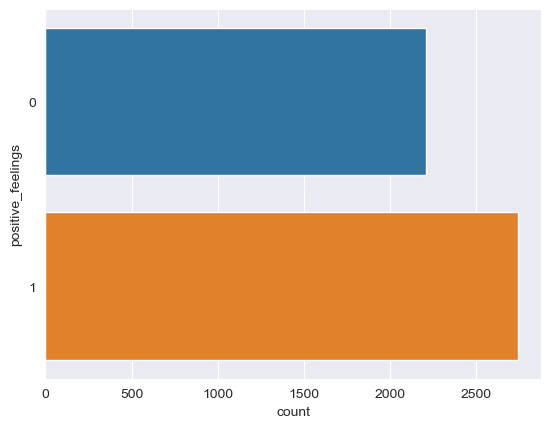

,id,date,negative_feelings,positive_feelings
0,621e2f3967b776a240c654db,2021-05-24,0,1
1,621e362467b776a2404ad513,2021-05-24,0,1
2,621e32d967b776a240627414,2021-05-24,0,1
3,621e2f7a67b776a240f14425,2021-05-24,0,1
4,621e34ca67b776a240be3b69,2021-05-24,1,0
...,...,...,...,...
4943,621e2eaf67b776a2406b14ac,2022-01-16,1,0
4944,621e346f67b776a24081744f,2022-01-17,1,0
4945,621e30f467b776a240f22944,2022-01-17,0,1
4946,621e2f9167b776a240011ccb,2022-01-17,1,0


In [63]:
sema=pd.read_pickle('data/semas_read_from_the_base_experiment_dates.pkl')
sema=sema_basic_preprocessing(sema)
sema

In [64]:
sema.to_pickle('data/sema_to_baseline_model.pkl')

# Combine semas/surveys with fitbit

In [65]:
def data_to_baseline_model(df): # df is sema or surveys dataframe

    data=fitbit.merge(df,on=['date','id'])

    data['date'] = pd.to_datetime(data.date, format='%m/%d/%y %H:%M:%S')
    data = data.astype({"date": str})
    #Extract features from date
    data["year"] = data["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
    data["month"] = data["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)
    data["weekday"] = data["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').weekday())
    data["week"] = data["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').isocalendar()[1])
    data["day"] = data["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').day)

    # Sin transformation in date features
    data["month_sin"] = sin_transform(data["month"])
    data["weekday_sin"] = sin_transform(data["weekday"])
    data["week_sin"] = sin_transform(data["week"])
    data["day_sin"] = sin_transform(data["day"])

    # Cosine transformation in date features
    data["month_cos"] = cos_transform(data["month"])
    data["weekday_cos"] = cos_transform(data["weekday"])
    data["week_cos"] = cos_transform(data["week"])
    data["day_cos"] = cos_transform(data["day"])

    data=data.drop(columns=['id', 'date','year', 'month', 'weekday', 'week', 'day'])

    return data

In [66]:
fitbit=pd.read_pickle('data/fitbit_all_numerical.pkl')
sema=pd.read_pickle('data/sema_to_baseline_model.pkl')
data=data_to_baseline_model(sema)
data

,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,...,negative_feelings,positive_feelings,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,34.710232,NaN,NaN,NaN,74.0,0.700000,0.700,0.833333,-1.822489,3682.90,...,0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
1,34.526732,67.118,37.722,10.6,0.0,0.000000,0.000,0.000000,-3.007565,2412.87,...,0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
2,34.526732,67.118,37.722,10.6,0.0,0.000000,0.000,0.000000,-3.007565,2412.87,...,0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
3,34.526732,67.118,37.722,10.6,0.0,0.000000,0.000,0.000000,-3.007565,2412.87,...,0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
4,NaN,69.820,28.594,16.4,76.0,0.800000,0.850,0.600000,-1.184004,1690.71,...,0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,33.277004,46.697,62.157,13.0,76.0,0.633333,0.825,0.800000,-2.266232,3800.45,...,0,1,0.866025,-0.781831,0.587785,-0.101168,0.5,0.62349,0.809017,-0.994869
4941,32.903545,71.863,25.475,18.2,72.0,0.833333,0.625,0.733333,-3.234348,1549.08,...,1,0,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139
4942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1120.51,...,0,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139
4943,34.716690,58.489,28.329,14.2,76.0,0.800000,0.600,0.933333,-2.096381,1913.30,...,1,0,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139


In [67]:
data['Spinning'].value_counts()

0.0    2272
Name: Spinning, dtype: int64

In [68]:
data['Bootcamp'].value_counts()

0.0    2272
Name: Bootcamp, dtype: int64

In [69]:
data=data.drop(columns=['Spinning', 'Bootcamp'])

In [70]:
data.to_pickle('data/data_to_model.pkl')
# for semas there are duplicates here due to semas that are sent thrice per day, thus they are acceptable

# Preprocessing Pipeline
1. handle categorical variables DONE (fitbit and semas)
2. drop duplicates DONE (fitbit and semas)
3. remove NaN labels TODO (in surveys)
3. handle/replace outliers with NaNs DONE
4. handle/replace NaN labels --- fill NaN values with user’s median (overall or past) DONE
5. fix imbalanced features
6. normalization

In [71]:
def preprocessing(data):

    # replace outliers
    data=data.mask(data.sub(data.mean()).div(data.std()).abs().gt(2))

    # replace nans
    data=data.apply(lambda x: x.fillna(x.median()),axis=0)

    return data

In [72]:
df=preprocessing(data)
df

,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,...,negative_feelings,positive_feelings,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,34.710232,61.555,35.4345,14.4,74.0,0.700000,0.700,0.833333,-1.822489,3682.90,...,0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
1,34.526732,67.118,37.7220,10.6,77.0,0.800000,0.750,0.766667,-3.007565,2412.87,...,0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
2,34.526732,67.118,37.7220,10.6,77.0,0.800000,0.750,0.766667,-3.007565,2412.87,...,0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
3,34.526732,67.118,37.7220,10.6,77.0,0.800000,0.750,0.766667,-3.007565,2412.87,...,0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
4,33.991756,69.820,28.5940,16.4,76.0,0.800000,0.850,0.600000,-1.184004,1690.71,...,0,1,-0.866025,0.000000,0.309017,-0.988468,0.5,1.00000,0.951057,0.151428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,33.277004,46.697,62.1570,13.0,76.0,0.633333,0.825,0.800000,-2.266232,3800.45,...,0,1,0.866025,-0.781831,0.587785,-0.101168,0.5,0.62349,0.809017,-0.994869
4941,32.903545,71.863,25.4750,18.2,72.0,0.833333,0.625,0.733333,-3.234348,1549.08,...,1,0,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139
4942,33.991756,61.555,35.4345,14.4,77.0,0.800000,0.750,0.766667,-1.379863,1120.51,...,0,1,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139
4943,34.716690,58.489,28.3290,14.2,76.0,0.800000,0.600,0.933333,-2.096381,1913.30,...,1,0,0.866025,0.000000,0.809017,-0.299363,0.5,1.00000,0.587785,-0.954139


In [73]:
df.to_pickle('data/data_preprocessed.pkl')

1. data/fitbit_to_baseline_model.pkl
(experiment dates, drop duplicates, convert falsely categorical variables)
2. data/fitbit_all_numerical.pkl
(delete almost empty columns, one-hot encoding)
3. data/sema_to_baseline_model.pkl
(date-id-negative feelings-positive feelings, only experimental dates)
4. data/data_to_model.pkl
(merge fitbit and sema/surveys, transform time)
5. data/data_preprocessed.pkl
(handle outliers and NaNs)